In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

In [ ]:
pip install kmodes

In [ ]:
# Choosing required parameters
df_selected = pd.read_csv('/content/enh_wm_non_rec.csv')
categorical_vars = ['Case','Cellularity','ML_label'];
numerical_vars = ['lifet_avg_ch1','lifet_avg_ch2','lifet_avg_ch3','int_ratio_ch1','int_ratio_ch2','int_ratio_ch3',
                  'Laguerre_coeffs_1_ch1','Laguerre_coeffs_2_ch1','Laguerre_coeffs_3_ch1','Laguerre_coeffs_4_ch1',
                  'Laguerre_coeffs_5_ch1','Laguerre_coeffs_6_ch1','Laguerre_coeffs_7_ch1','Laguerre_coeffs_8_ch1',
                  'Laguerre_coeffs_9_ch1','Laguerre_coeffs_10_ch1','Laguerre_coeffs_11_ch1','Laguerre_coeffs_12_ch1',
                  'Laguerre_coeffs_1_ch2','Laguerre_coeffs_2_ch2','Laguerre_coeffs_3_ch2','Laguerre_coeffs_4_ch2',
                  'Laguerre_coeffs_5_ch2','Laguerre_coeffs_6_ch2','Laguerre_coeffs_7_ch2','Laguerre_coeffs_8_ch2',
                  'Laguerre_coeffs_9_ch2','Laguerre_coeffs_10_ch2','Laguerre_coeffs_11_ch2','Laguerre_coeffs_12_ch2',
                  'Laguerre_coeffs_1_ch3','Laguerre_coeffs_2_ch3','Laguerre_coeffs_3_ch3','Laguerre_coeffs_4_ch3',
                  'Laguerre_coeffs_5_ch3','Laguerre_coeffs_6_ch3','Laguerre_coeffs_7_ch3','Laguerre_coeffs_8_ch3',
                  'Laguerre_coeffs_9_ch3','Laguerre_coeffs_10_ch3','Laguerre_coeffs_11_ch3','Laguerre_coeffs_12_ch3',
                  'Phasor_GH1_ch1','Phasor_SH1_ch1','Phasor_GH1_ch2','Phasor_SH1_ch2','Phasor_GH1_ch3','Phasor_SH1_ch3',
                  'Phasor_GH2_ch1','Phasor_SH2_ch1','Phasor_GH2_ch2','Phasor_SH2_ch2','Phasor_GH2_ch3','Phasor_SH2_ch3',
                  'Phasor_GH3_ch1','Phasor_SH3_ch1','Phasor_GH3_ch2','Phasor_SH3_ch2','Phasor_GH3_ch3','Phasor_SH3_ch3'
];
# Select only the columns present in numerical_vars and categorical_vars
df = df_selected[numerical_vars + categorical_vars].copy()
df = df.dropna()

In [ ]:
# Normalization, one-hot encoding and PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# One-hot encode categorical features
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_encoded = oh_encoder.fit_transform(df[categorical_vars])
# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_vars])
# PCA on numerical features
pca = PCA(n_components=0.95)
pca_reduced = pca.fit_transform(scaled_numerical)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Getting features dominating each PCA
# Get the principal component coefficients (contributions)
principal_components_matrix = pca.components_

# Create a DataFrame to show the feature contributions for each principal component
feature_names = numerical_vars
component_names = [f'PC{i+1}' for i in range(principal_components_matrix.shape[0])]
contributions_df = pd.DataFrame(principal_components_matrix, columns=feature_names, index=component_names)

# For each principal component, get the top contributing feature(s) by absolute value
top_contributing_features = {}
for component in component_names:
    top_feature_index = np.argmax(np.abs(contributions_df.loc[component]))
    top_feature = contributions_df.columns[top_feature_index]
    top_contributing_features[component] = top_feature

# Display the top contributing features for each principal component
for component, feature in top_contributing_features.items():
    print(f"{component}: Top Contributing Feature: {feature}")


PC1: Top Contributing Feature: Phasor_SH2_ch2
PC2: Top Contributing Feature: Laguerre_coeffs_7_ch3
PC3: Top Contributing Feature: Laguerre_coeffs_6_ch1
PC4: Top Contributing Feature: Laguerre_coeffs_1_ch1
PC5: Top Contributing Feature: Phasor_SH3_ch1
PC6: Top Contributing Feature: Laguerre_coeffs_3_ch2
PC7: Top Contributing Feature: Laguerre_coeffs_11_ch2
PC8: Top Contributing Feature: int_ratio_ch2
PC9: Top Contributing Feature: Laguerre_coeffs_2_ch3
PC10: Top Contributing Feature: Laguerre_coeffs_11_ch3
PC11: Top Contributing Feature: lifet_avg_ch1
PC12: Top Contributing Feature: int_ratio_ch2
PC13: Top Contributing Feature: lifet_avg_ch1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

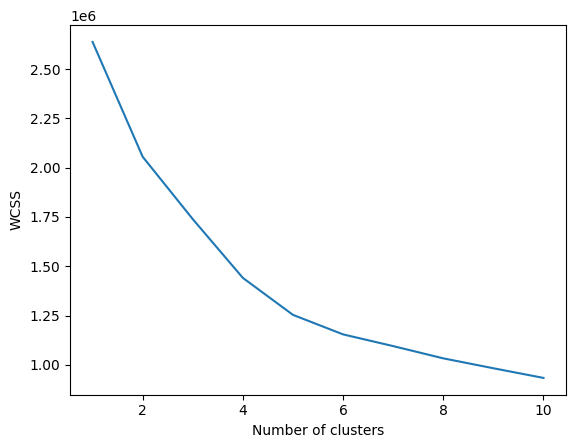

In [ ]:
# Choosing optimal number of cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Elbow method to determine clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# Visual inspection of elbow plot to pick k

In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=4)
all_data = np.concatenate([oh_encoded, pca_reduced], axis=1)
y_kmeans = kmeans.fit_predict(all_data)
# Evaluate clusters
silhouette = silhouette_score(all_data, y_kmeans)
print(silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2659238619304005


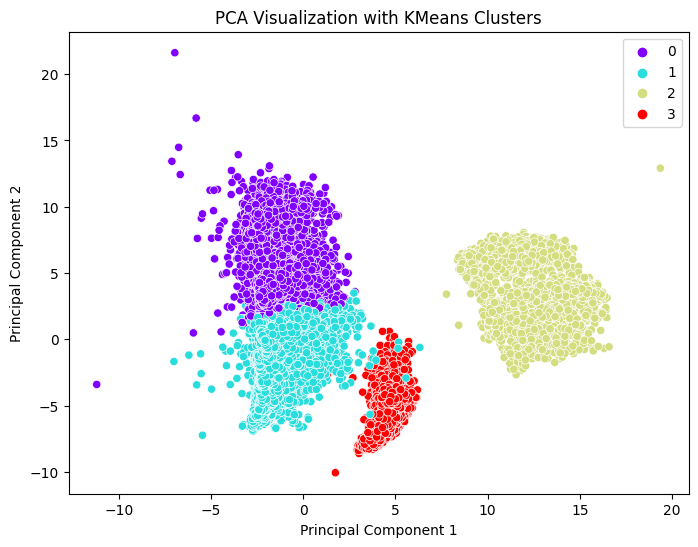

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of PCA-reduced data with KMeans cluster colors
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_reduced[:, 0], y=pca_reduced[:, 1], hue=y_kmeans, palette='rainbow')
plt.title('PCA Visualization with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

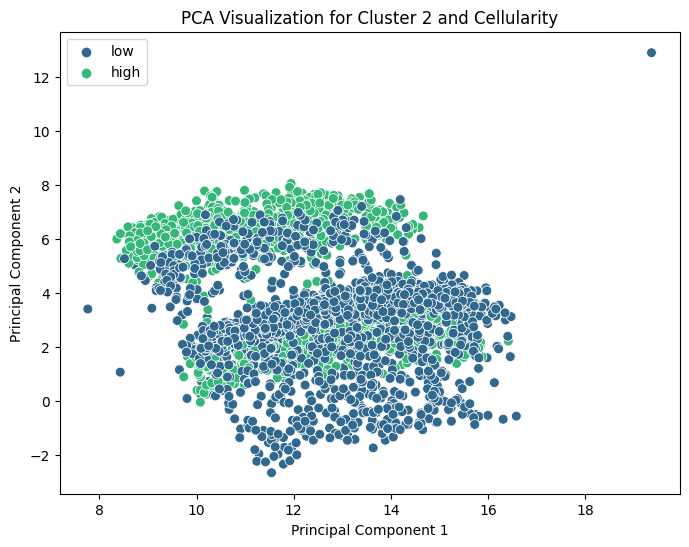

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine PCA-reduced data, cluster labels, and original 'Cellularity' values
clustered_data = np.column_stack((pca_reduced[:, 0], pca_reduced[:, 1], y_kmeans))
clustered_df = pd.DataFrame(clustered_data, columns=['PC1', 'PC2', 'Cluster'])

# Add 'Cellularity' values to the DataFrame
clustered_df['Cellularity'] = df['Cellularity']

# Specify the cluster you want to visualize
selected_cluster = 2

# Filter the data for the selected cluster
selected_cluster_data = clustered_df[clustered_df['Cluster'] == selected_cluster]

# Create scatter plot for the selected cluster with colors representing 'Cellularity'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_cluster_data, x='PC1', y='PC2', hue='Cellularity', palette='viridis', s=50)
plt.title(f'PCA Visualization for Cluster {selected_cluster} and Cellularity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


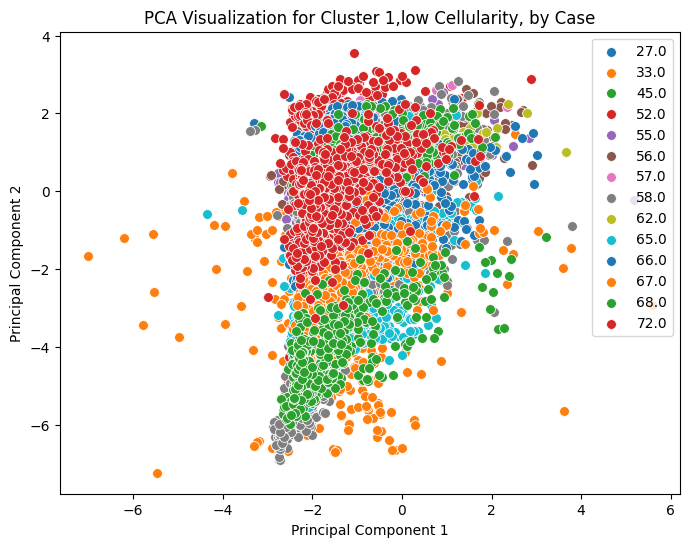

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine PCA-reduced data, cluster labels, and original 'Cellularity' values
clustered_data = np.column_stack((pca_reduced[:, 0], pca_reduced[:, 1], y_kmeans))
clustered_df = pd.DataFrame(clustered_data, columns=['PC1', 'PC2', 'Cluster'])

# Add 'Cellularity' values to the DataFrame
clustered_df['Cellularity'] = df['Cellularity']
# Add 'Case' values to the DataFrame
clustered_df['Case'] = df['Case']

# Specify the cluster you want to visualize
selected_cluster = 1

# Specify the 'Cellularity' value to consider
cellularity_value = 'low'  # Adjust this based on your data

# Filter the data for the selected cluster and high cellularity
selected_cluster_high_cellularity_data = clustered_df[
    (clustered_df['Cluster'] == selected_cluster) & (clustered_df['Cellularity'] == cellularity_value)
]

# Create a separate scatter plot for each 'Case' within the selected cluster and high cellularity
plt.figure(figsize=(8, 6))
unique_case_values = selected_cluster_high_cellularity_data['Case'].unique()
palette = sns.color_palette("tab10", n_colors=len(unique_case_values))

for idx, case_value in enumerate(unique_case_values):
    case_data = selected_cluster_high_cellularity_data[selected_cluster_high_cellularity_data['Case'] == case_value]
    sns.scatterplot(data=case_data, x='PC1', y='PC2', color=palette[idx], s=50, label=case_value)

plt.title(f'PCA Visualization for Cluster {selected_cluster},{cellularity_value} Cellularity, by Case')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
# Adding cluster to original df
df['cluster'] = y_kmeans
df['cluster'].value_counts()

1    27503
0    10604
3     4799
2     2919
Name: cluster, dtype: int64

In [ ]:
# Saving cluster into CSV files
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]
cluster_3 = df[df['cluster'] == 3]

cluster_0.to_csv('cluster_0_data.csv', index=False)
cluster_1.to_csv('cluster_1_data.csv', index=False)
cluster_2.to_csv('cluster_2_data.csv', index=False)
cluster_2.to_csv('cluster_3_data.csv', index=False)

In [ ]:
df.groupby('cluster').mean()

<ipython-input-13-de1c4842ceee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean()


,lifet_avg_ch1,lifet_avg_ch2,lifet_avg_ch3,int_ratio_ch1,int_ratio_ch2,int_ratio_ch3,Laguerre_coeffs_1_ch1,Laguerre_coeffs_2_ch1,Laguerre_coeffs_3_ch1,Laguerre_coeffs_4_ch1,...,Phasor_SH2_ch2,Phasor_GH2_ch3,Phasor_SH2_ch3,Phasor_GH3_ch1,Phasor_SH3_ch1,Phasor_GH3_ch2,Phasor_SH3_ch2,Phasor_GH3_ch3,Phasor_SH3_ch3,Case
cluster,,,,,,,,,,,,,,,,,,,,,
0,4.237676,5.981078,6.308301,0.087051,0.470536,0.442413,3.043047,-0.149115,0.549489,0.005034,...,0.094843,0.540413,0.094582,0.595414,-0.022042,0.491979,-0.002676,0.467404,-0.000081,60.249434
1,4.323913,4.770806,4.506432,0.127751,0.500360,0.371888,3.221792,-0.281548,0.581698,-0.025607,...,0.068123,0.680048,0.041187,0.580540,-0.018633,0.574328,-0.030807,0.595432,-0.056962,55.543141
2,4.479378,4.825170,4.501919,0.166086,0.475907,0.358007,3.902007,-0.508592,0.759798,-0.045559,...,0.644396,-0.057952,0.674195,-0.442423,0.284364,-0.378943,0.385185,-0.383574,0.431987,79.935937
3,4.190424,4.517557,4.316675,0.097974,0.466124,0.435902,1.804074,-0.058443,0.392483,0.018946,...,0.379232,0.502098,0.354832,0.376353,0.402746,0.394421,0.358027,0.436283,0.336640,12.902063


In [ ]:
# Mean for each cluster
pd.options.display.max_columns = None
df.groupby('cluster').mean().T

<ipython-input-14-1a899fd16a5c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().T


cluster,0,1,2,3
lifet_avg_ch1,4.237676,4.323913,4.479378,4.190424
lifet_avg_ch2,5.981078,4.770806,4.825170,4.517557
lifet_avg_ch3,6.308301,4.506432,4.501919,4.316675
int_ratio_ch1,0.087051,0.127751,0.166086,0.097974
int_ratio_ch2,0.470536,0.500360,0.475907,0.466124
...,...,...,...,...
Phasor_GH3_ch2,0.491979,0.574328,-0.378943,0.394421
Phasor_SH3_ch2,-0.002676,-0.030807,0.385185,0.358027
Phasor_GH3_ch3,0.467404,0.595432,-0.383574,0.436283
Phasor_SH3_ch3,-0.000081,-0.056962,0.431987,0.336640


In [ ]:
# Median for each cluster
df.groupby('cluster').median().T

<ipython-input-15-45634a766845>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').median().T


cluster,0,1,2,3
lifet_avg_ch1,4.270085,4.345309,4.529265,4.189794
lifet_avg_ch2,5.953540,4.863923,4.759967,4.538538
lifet_avg_ch3,6.250996,4.535687,4.341569,4.254745
int_ratio_ch1,0.085308,0.121178,0.177282,0.097391
int_ratio_ch2,0.463639,0.494719,0.475506,0.466786
...,...,...,...,...
Phasor_GH3_ch2,0.493545,0.568317,-0.382011,0.382201
Phasor_SH3_ch2,-0.002522,-0.027190,0.387717,0.360248
Phasor_GH3_ch3,0.471413,0.592415,-0.388233,0.432987
Phasor_SH3_ch3,0.000177,-0.053063,0.445682,0.338933


In [ ]:
# Displaying top PCA features
# KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(all_data)

# Get cluster centers
centers = kmeans.cluster_centers_

# Calculate ranges for PCA dimensions
ranges = centers[:, len(categorical_vars):].max(axis=0) - centers[:, len(categorical_vars):].min(axis=0)

# Sort and print top PCA features
important_features = np.argsort(ranges)[::-1]
print(important_features[:5])

orig_cols = df[numerical_vars].columns
important_features = orig_cols[important_features]
print(important_features[:5])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[33 34 40 38 36]
Index(['Laguerre_coeffs_4_ch3', 'Laguerre_coeffs_5_ch3',
       'Laguerre_coeffs_11_ch3', 'Laguerre_coeffs_9_ch3',
       'Laguerre_coeffs_7_ch3'],
      dtype='object')


In [ ]:
# Cellularity VS Cluster data
pd.crosstab(df['Cellularity'], df['cluster'])

cluster,0,1,2,3
Cellularity,,,,
absent,1018,4047,0,859
high,1177,3466,938,0
low,8287,15744,1980,2628
moderate,122,4246,1,1312


<Axes: xlabel='cluster'>

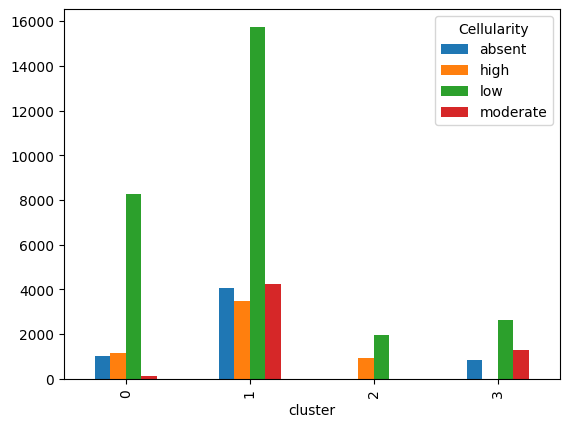

In [ ]:
# Plot Cellularity VS Cluster
pd.crosstab( df['cluster'], df['Cellularity']).plot(kind='bar')

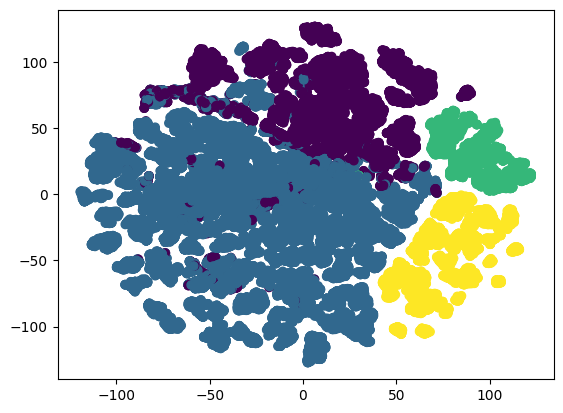

In [ ]:
# TSNE visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_reduced = tsne.fit_transform(all_data)
plt.scatter(tsne_reduced[:,0], tsne_reduced[:,1], c=y_kmeans)

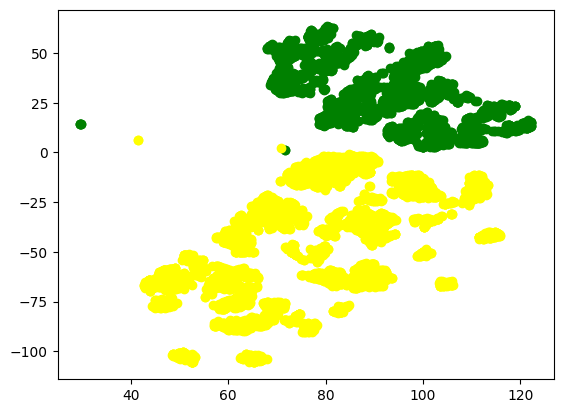

In [ ]:
# Separating the clusters
from matplotlib import colors
x=tsne_reduced[:,0]
y=tsne_reduced[:,1]
c0_mask = (y_kmeans == 0)
c1_mask = (y_kmeans == 1)
c2_mask = (y_kmeans == 2)
c3_mask = (y_kmeans == 3)

# plt.scatter(x[c0_mask], y[c0_mask], c='purple')
# plt.scatter(x[c1_mask], y[c1_mask], c='blue')
plt.scatter(x[c2_mask], y[c2_mask], c='green')
plt.scatter(x[c3_mask], y[c3_mask], c='yellow')

<Axes: xlabel='tsne-x', ylabel='tsne-y'>

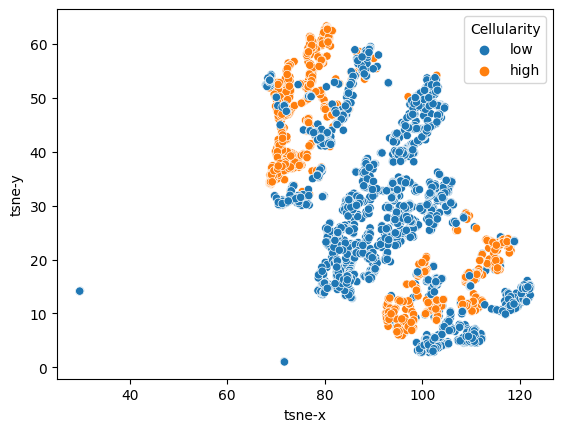

In [ ]:
# Plot for each cluster
import seaborn as sns
# Create DataFrame from TSNE data
tsne_df = pd.DataFrame(tsne_reduced, columns=['tsne-x', 'tsne-y'])

# Add Cluster column
tsne_df['Cluster'] = y_kmeans

# Merge tsne_df back to original data
df_tsne = pd.concat([df, tsne_df], axis=1)

# Filter to Cluster 0
df_tsne_cluster0 = df_tsne[df_tsne['Cluster'] == 2]

# Scatter plot for Cluster 0
sns.scatterplot(x="tsne-x", y="tsne-y",
                hue="Cellularity",
                data=df_tsne_cluster0)

<Axes: xlabel='tsne-x', ylabel='tsne-y'>

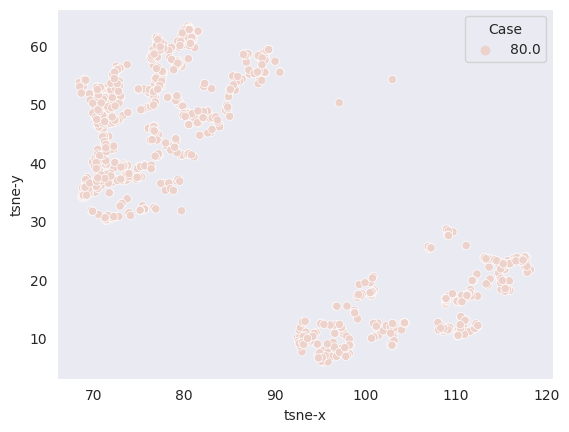

In [ ]:
# Plot for each cluster
import seaborn as sns
# Create DataFrame from TSNE data
tsne_df = pd.DataFrame(tsne_reduced, columns=['tsne-x', 'tsne-y'])

# Add Cluster column
tsne_df['Cluster'] = y_kmeans

# Merge tsne_df back to original data
df_tsne = pd.concat([df, tsne_df], axis=1)

# Filter to Cluster 0
df_tsne_cluster0 = df_tsne[(df_tsne['Cluster'] == 2) & (df_tsne['Cellularity'] == 'high')]

# Scatter plot for Cluster 0
sns.scatterplot(x="tsne-x", y="tsne-y",
                hue="Case",
                data=df_tsne_cluster0)

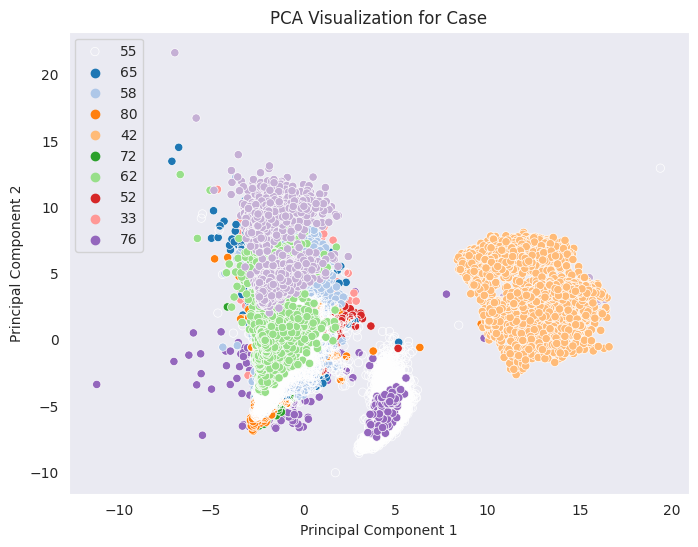

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine PCA-reduced data, cluster labels, and original 'Cellularity' values
clustered_data = np.column_stack((pca_reduced[:, 0], pca_reduced[:, 1], y_kmeans))
clustered_df = pd.DataFrame(clustered_data, columns=['PC1', 'PC2', 'Cluster'])

# Add 'Cellularity' values to the DataFrame
clustered_df['Case'] = df['Case']

# Get top cases
top_cases = df['Case'].value_counts().nlargest(10).index

# Filter the data for the selected cluster
selected_clustered_data = clustered_df[clustered_df['Cluster'].isin([0, 1, 2, 3])]

# Create large enough color palette
palette = sns.color_palette('tab20', n_colors=len(top_cases))

# Plot with hue order set
plt.figure(figsize=(8, 6))
sns.set_style('dark')
sns.scatterplot(data=selected_clustered_data,
                x='PC1', y='PC2',
                hue='Case', hue_order=top_cases,
                palette=palette)

# # Create scatter plot for the selected cluster with colors representing 'Cellularity'
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=selected_clustered_data, x='PC1', y='PC2', hue='Case', palette='viridis', s=50)
plt.title(f'PCA Visualization for Case')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.legend(labels=top_cases)
plt.show()

In [ ]:
# For MeanShift Clustering
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

df_selected = pd.read_csv('/content/enh_wm_non_rec.csv')
categorical_vars = ['Case','Cellularity','ML_label'];
numerical_vars = ['lifet_avg_ch1','lifet_avg_ch2','lifet_avg_ch3','int_ratio_ch1','int_ratio_ch2','int_ratio_ch3',
                  'Laguerre_coeffs_1_ch1','Laguerre_coeffs_2_ch1','Laguerre_coeffs_3_ch1','Laguerre_coeffs_4_ch1',
                  'Laguerre_coeffs_5_ch1','Laguerre_coeffs_6_ch1','Laguerre_coeffs_7_ch1','Laguerre_coeffs_8_ch1',
                  'Laguerre_coeffs_9_ch1','Laguerre_coeffs_10_ch1','Laguerre_coeffs_11_ch1','Laguerre_coeffs_12_ch1',
                  'Laguerre_coeffs_1_ch2','Laguerre_coeffs_2_ch2','Laguerre_coeffs_3_ch2','Laguerre_coeffs_4_ch2',
                  'Laguerre_coeffs_5_ch2','Laguerre_coeffs_6_ch2','Laguerre_coeffs_7_ch2','Laguerre_coeffs_8_ch2',
                  'Laguerre_coeffs_9_ch2','Laguerre_coeffs_10_ch2','Laguerre_coeffs_11_ch2','Laguerre_coeffs_12_ch2',
                  'Laguerre_coeffs_1_ch3','Laguerre_coeffs_2_ch3','Laguerre_coeffs_3_ch3','Laguerre_coeffs_4_ch3',
                  'Laguerre_coeffs_5_ch3','Laguerre_coeffs_6_ch3','Laguerre_coeffs_7_ch3','Laguerre_coeffs_8_ch3',
                  'Laguerre_coeffs_9_ch3','Laguerre_coeffs_10_ch3','Laguerre_coeffs_11_ch3','Laguerre_coeffs_12_ch3',
                  'Phasor_GH1_ch1','Phasor_SH1_ch1','Phasor_GH1_ch2','Phasor_SH1_ch2','Phasor_GH1_ch3','Phasor_SH1_ch3',
                  'Phasor_GH2_ch1','Phasor_SH2_ch1','Phasor_GH2_ch2','Phasor_SH2_ch2','Phasor_GH2_ch3','Phasor_SH2_ch3',
                  'Phasor_GH3_ch1','Phasor_SH3_ch1','Phasor_GH3_ch2','Phasor_SH3_ch2','Phasor_GH3_ch3','Phasor_SH3_ch3'
];
# Select only the columns present in numerical_vars and categorical_vars
df = df_selected[numerical_vars + categorical_vars].copy()
df = df.dropna()

# One-hot encode categorical features
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_encoded = oh_encoder.fit_transform(df[categorical_vars])
# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_vars])
all_data = np.concatenate([oh_encoded, scaled_numerical], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift
from sklearn.metrics import silhouette_score

# Use KMeans to cluster categorical features
kmeans = KMeans(n_clusters=4)
categorical_clusters = kmeans.fit_predict(oh_encoded)

# Append categorical cluster labels to the numeric data
X_with_labels = np.hstack((scaled_numerical, categorical_clusters.reshape(-1, 1)))

# Apply MeanShift on the combined data
mean_shift = MeanShift()
labels = mean_shift.fit_predict(X_with_labels)

# Evaluate the clusters (optional)
silhouette_avg = silhouette_score(X_with_labels, labels)
print("Silhouette Score:", silhouette_avg)


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_with_labels)

# Plot the clusters in the reduced-dimensional space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mean Shift Clustering with PCA Visualization')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_with_labels)

# Plot the clusters in the t-SNE space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='rainbow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Mean Shift Clustering with t-SNE Visualization')
plt.show()